## 构建高级模型

### 函数式API

tf.keras.Sequential 模型是层的简单堆叠，无法表示任意模型。深度学习模型通常是由layer构成的有向无环图(directed acyclic graph, DAG),使用 Keras 函数式 API 可以构建复杂的模型拓扑，例如：

- 多输入模型，
- 多输出模型，
- 具有共享层的模型（同一层被调用多次），
- 具有非序列数据流的模型（例如，剩余连接）。

使用函数式 API 构建的模型具有以下特征：

- 层实例可调用并返回张量。
- 输入张量和输出张量用于定义 tf.keras.Model 实例。
- 此模型的训练方式和 Sequential 模型一样。

使用函数式 API 构建一个简单的全连接网络

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
inputs = tf.keras.Input(shape=(32,))
print(inputs.shape, inputs.dtype)

x = layers.Dense(64, activation='relu', name='Dense_Layer1')(inputs)  # 通过name参数为layer设置名称
x = layers.Dense(64, activation=tf.keras.activations.relu)(inputs=x)
predictions = layers.Dense(10, activation=tf.keras.activations.softmax)(inputs=x)

(None, 32) <dtype: 'float32'>


在给定输入和输出的情况下实例化模型。

In [6]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

模型结构可视化

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
Dense_Layer1 (Dense)         (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


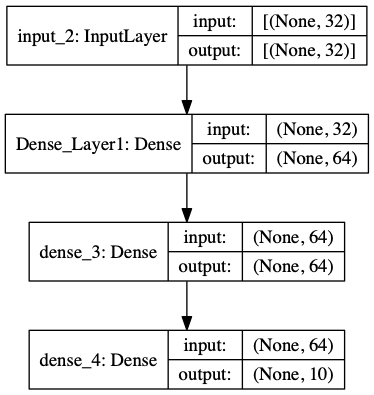

In [9]:
keras.utils.plot_model(model, 'my_model.png', show_layer_names=True, show_shapes=True)

In [86]:
# compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

In [87]:
model.fit(data, labels, batch_size=32, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 0s 113us/sample - loss: 203.2984 - categorical_accuracy: 0.1130
Epoch 2/5
1000/1000 [==============================] - 0s 34us/sample - loss: 843.6980 - categorical_accuracy: 0.1060
Epoch 3/5
1000/1000 [==============================] - 0s 33us/sample - loss: 1762.6182 - categorical_accuracy: 0.0910
Epoch 4/5
1000/1000 [==============================] - 0s 26us/sample - loss: 2914.6214 - categorical_accuracy: 0.0950
Epoch 5/5
1000/1000 [==============================] - 0s 25us/sample - loss: 4258.0425 - categorical_accuracy: 0.0970
